### 단지분류: 3가지로 나뉜거 비례관계가 있나 확인한번! 주상복합도 항목으로 넣어볼까? 전용면적이 적으면 실거주자도 적으니깐 주차수요도 낮지않을까? 어떤 피쳐로 넣을까?

In [1]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = 'C:/Windows/Fonts/malgun.ttf'
if platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=='Darwin' :
    rc('font', family='AppleGothic')
else:
    print('Unknown System')
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd

train = pd.read_csv('./train_df_errno.csv')
test = pd.read_csv('./test_df.csv')
sub = pd.read_csv('./sample_submission.csv')
age = pd.read_csv('./age_gender_info.csv')

In [4]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수',
       '10분내버스정류장수', '단지내주차면수', '등록차량수']

test.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수',
       '10분내버스정류장수', '단지내주차면수']

### 단지분류 : 소,중,대단지 
### 단지분류lbl : 1, 2, 3

In [5]:
train.loc[train['총세대수']<600,'단지분류'] = '소단지'
train.loc[(600 <= train["총세대수"]) & (train["총세대수"] <= 1199),'단지분류']='중단지'
train.loc[(1200 <= train["총세대수"]),'단지분류']='대단지'


In [6]:
test.loc[test['총세대수']<600,'단지분류'] = '소단지'
test.loc[(600 <= test["총세대수"]) & (test["총세대수"] <= 1199),'단지분류']='중단지'
test.loc[(1200 <= test["총세대수"]),'단지분류']='대단지'


In [7]:
mapping = {'소단지' : 1,'중단지' : 2, '대단지' : 3}
train['단지분류lbl'] = train['단지분류'].map(mapping).astype(int)

In [8]:
mapping = {'소단지' : 1,'중단지' : 2, '대단지' : 3}
test['단지분류lbl'] = test['단지분류'].map(mapping).astype(int)

In [9]:
train.corr()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,단지분류lbl
총세대수,1.000000,0.040103,0.098876,0.066245,0.211792,-0.002773,0.522593,0.333440,0.877234
전용면적,0.040103,1.000000,-0.032453,-0.081549,-0.010291,-0.005071,0.067340,0.112717,0.026065
전용면적별세대수,0.098876,-0.032453,1.000000,0.162061,-0.057606,0.045394,0.283585,0.250513,0.119410
공가수,0.066245,-0.081549,0.162061,1.000000,-0.094096,0.043936,0.288062,0.118910,0.138416
10분내지하철수,0.211792,-0.010291,-0.057606,-0.094096,1.000000,0.097503,-0.053185,-0.107308,0.231003
10분내버스정류장수,-0.002773,-0.005071,0.045394,0.043936,0.097503,1.000000,0.073013,0.104135,0.041361
단지내주차면수,0.522593,0.067340,0.283585,0.288062,-0.053185,0.073013,1.000000,0.861338,0.549478
등록차량수,0.333440,0.112717,0.250513,0.118910,-0.107308,0.104135,0.861338,1.000000,0.368356
단지분류lbl,0.877234,0.026065,0.119410,0.138416,0.231003,0.041361,0.549478,0.368356,1.000000


In [10]:
pd.set_option("display.max_rows", 500)

<BarContainer object of 2896 artists>

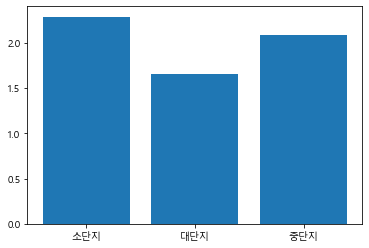

In [11]:
plt.bar(train['단지분류'],train['등록차량수']/train['총세대수'])

In [12]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수',
       '단지분류', '단지분류lbl'],
      dtype='object')

In [13]:
pd.set_option("display.max_rows", 1000)

In [14]:
train.loc[train['임대건물구분']=='상가']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,단지분류,단지분류lbl
80,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,중단지,2
81,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,중단지,2
82,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,중단지,2
83,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0,중단지,2
93,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2
94,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2
95,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2
96,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2
97,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2
98,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0,중단지,2


<AxesSubplot:xlabel='단지분류', ylabel='단지내주차면수'>

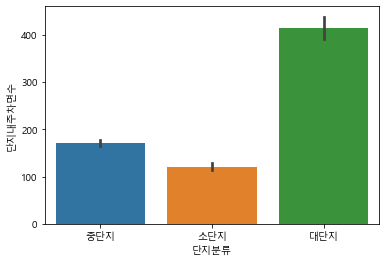

In [24]:
sns.barplot(data=train.loc[train['임대건물구분']=='상가'],x='단지분류',y='단지내주차면수')

<AxesSubplot:xlabel='단지분류', ylabel='단지내주차면수'>

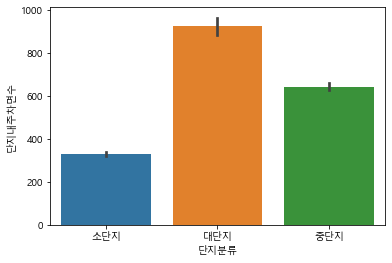

In [25]:
sns.barplot(data=train, x='단지분류',y='단지내주차면수')

<AxesSubplot:xlabel='단지분류', ylabel='등록차량수'>

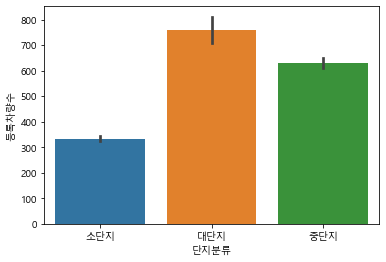

In [27]:
sns.barplot(data=train, x='단지분류',y='등록차량수')

<AxesSubplot:xlabel='전용면적', ylabel='등록차량수'>

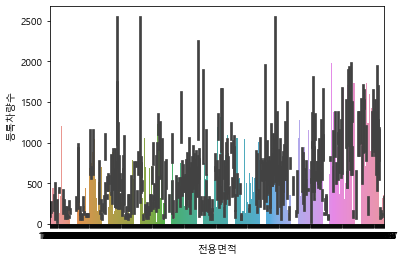

In [17]:
sns.barplot(data=train, x='전용면적',y='등록차량수')

### 전용면적 12.62~583.4

In [18]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '10분내지하철수', '10분내버스정류장수', '단지내주차면수', '등록차량수',
       '단지분류', '단지분류lbl'],
      dtype='object')

In [19]:
train['전용면적'].max()

583.4

### 전용면적이랑 등록차량수와 관계가 있을까..........

In [20]:
train.loc[train['전용면적']>200]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,단지분류,단지분류lbl
132,C2416,560,상가,경상남도,임대상가,317.17,1,0.0,D,NaN,NaN,0.0,5.0,154.0,63.0,소단지,1
189,C1616,1507,상가,대전광역시,임대상가,583.40,1,1.0,D,NaN,NaN,NaN,2.0,407.0,98.0,대단지,3
226,C2258,965,상가,대전광역시,임대상가,240.22,1,13.0,D,NaN,NaN,NaN,3.0,287.0,78.0,중단지,2
252,C2038,785,상가,대전광역시,임대상가,240.22,1,7.0,D,NaN,NaN,1.0,10.0,150.0,108.0,중단지,2
292,C1859,2424,상가,대전광역시,임대상가,583.40,1,1.0,D,NaN,NaN,1.0,4.0,487.0,116.0,대단지,3
379,C2135,1116,상가,부산광역시,임대상가,240.22,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0,중단지,2
408,C2034,1486,상가,부산광역시,임대상가,240.22,1,2.0,D,NaN,NaN,1.0,3.0,405.0,132.0,대단지,3
430,C1109,1957,상가,부산광역시,임대상가,401.50,1,1.0,D,NaN,NaN,1.0,2.0,351.0,313.0,대단지,3
456,C2289,1527,상가,부산광역시,임대상가,583.40,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0,대단지,3
488,C2597,1005,상가,부산광역시,임대상가,248.56,1,25.0,D,NaN,NaN,0.0,2.0,166.0,94.0,중단지,2


In [21]:
train.corr()

,총세대수,전용면적,전용면적별세대수,공가수,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,단지분류lbl
총세대수,1.000000,0.040103,0.098876,0.066245,0.211792,-0.002773,0.522593,0.333440,0.877234
전용면적,0.040103,1.000000,-0.032453,-0.081549,-0.010291,-0.005071,0.067340,0.112717,0.026065
전용면적별세대수,0.098876,-0.032453,1.000000,0.162061,-0.057606,0.045394,0.283585,0.250513,0.119410
공가수,0.066245,-0.081549,0.162061,1.000000,-0.094096,0.043936,0.288062,0.118910,0.138416
10분내지하철수,0.211792,-0.010291,-0.057606,-0.094096,1.000000,0.097503,-0.053185,-0.107308,0.231003
10분내버스정류장수,-0.002773,-0.005071,0.045394,0.043936,0.097503,1.000000,0.073013,0.104135,0.041361
단지내주차면수,0.522593,0.067340,0.283585,0.288062,-0.053185,0.073013,1.000000,0.861338,0.549478
등록차량수,0.333440,0.112717,0.250513,0.118910,-0.107308,0.104135,0.861338,1.000000,0.368356
단지분류lbl,0.877234,0.026065,0.119410,0.138416,0.231003,0.041361,0.549478,0.368356,1.000000


<AxesSubplot:xlabel='전용면적별세대수', ylabel='단지내주차면수'>

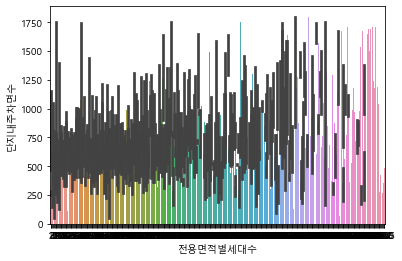

In [22]:
sns.barplot(data=train,x='전용면적별세대수',y='단지내주차면수')

In [23]:
train.loc[train['단지코드']=='C2515']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,10분내지하철수,10분내버스정류장수,단지내주차면수,등록차량수,단지분류,단지분류lbl
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000,82940,0.0,3.0,624.0,205.0,소단지,1
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,소단지,1
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000,107130,0.0,3.0,624.0,205.0,소단지,1
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,소단지,1
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000,149760,0.0,3.0,624.0,205.0,소단지,1
5,C2515,545,아파트,경상남도,국민임대,51.97,106,17.0,A,23042000,190090,0.0,3.0,624.0,205.0,소단지,1
6,C2515,545,아파트,경상남도,국민임대,51.97,26,17.0,A,23042000,190090,0.0,3.0,624.0,205.0,소단지,1


### 전용면적별 세대수와 단지내주차면수와 관계를 알아보자